In [1]:
import numpy as np
import pandas as pd
import autosklearn.regression
import sklearn.preprocessing as skp
from subprocess import check_output
import matplotlib.pyplot as plt
%matplotlib inline
#print(check_output(['ls',' ']).decode('utf8'))

In [2]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
y_train = np.log(train.pop('SalePrice'))
all_df = pd.concat((train,test),axis=0)

In [5]:
all_df['MSSubClass']=all_df['MSSubClass'].astype(str)

In [6]:
all_dummy = pd.get_dummies(all_df)
all_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [8]:
mean_cols=all_dummy.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [9]:
all_dummy = all_dummy.fillna(mean_cols)

In [10]:
dummy_train = all_dummy.loc[train.index]
dummy_test = all_dummy.loc[test.index]

In [11]:
X_train = dummy_train.values
X_test = dummy_test.values

In [12]:
#automl= autosklearn.regression.AutoSklearnRegressor()
#automl.fit(X_train,y_train.values)
#prediction = automl.predict(X_test)
#print("Params", automl.get_params())
#print("Models",automl.show_models())

In [29]:
from sklearn.linear_model import ElasticNet
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score

In [51]:
alphas = np.logspace(-4,1,50)
test_scores = []
scores_sigma = []
for alpha in alphas:
    clf = ElasticNet(alpha=alpha,normalize=False)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='mean_squared_error'))
    print(alpha,np.mean(test_score))
    test_scores.append(np.mean(test_score))
    scores_sigma.append(np.std(test_score))

/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinat

0.0001 0.146629358616


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.000126485521686 0.145097803774


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinat

0.000159985871961 0.143565318979


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinat

0.000202358964773 0.14200501876


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.00025595479227 0.140174832557
0.000323745754282 0.138797440437
0.000409491506238 0.137638986792
0.000517947467923 0.136782820996
0.00065512855686 0.13616493566
0.000828642772855 0.135937724388
0.00104811313415 0.136233440848
0.00132571136559 0.136987361575
0.00167683293681 0.138124908903
0.00212095088792 0.13965987225
0.00268269579528 0.141663593269
0.0033932217719 0.144459603703
0.00429193426013 0.147677748248
0.00542867543932 0.15011435847
0.00686648845004 0.151998336342
0.00868511373751 0.153847154554
0.0109854114199 0.155784997777
0.0138949549437 0.157743488537
0.0175751062485 0.159606502584
0.0222299648253 0.160939726537
0.0281176869797 0.162186736043
0.0355648030622 0.163657597406
0.0449843266897 0.165264568143
0.0568986602902 0.167703055077
0.0719685673001 0.171419749532
0.0910298177992 0.176891075752
0.115139539933 0.182495248464
0.14563484775 0.188331771855
0.184206996933 0.189050991605
0.232995181052 0.189255142635
0.294705170255 0.189260341809
0.372759372031 0.189283689622

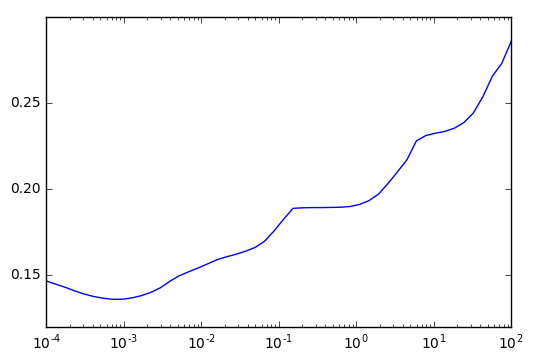

In [42]:
plt.plot(alphas,test_scores)
plt.xscale('log')

In [52]:
print(min(test_scores)) #alpha = 0.000828642772855 0.135937724388

0.135937724388


In [53]:
from sklearn.linear_model import BayesianRidge

In [64]:
clf2 = BayesianRidge()
test_score2 = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='mean_squared_error'))

In [65]:
print(np.mean(test_score2))

0.232261426622


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf2 = LogisticRegression()
test_score3 = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='mean_squared_error'))
print(np.mean(test_score3))

0.232261426622


In [69]:
from sklearn.ensemble import AdaBoostRegressor , RandomForestRegressor

In [84]:
clf1 = ElasticNet(alpha=0.00082)
clf2 = RandomForestRegressor(n_estimators=200,max_features=0.5)
clf3 = AdaBoostRegressor(n_estimators=200)

In [85]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=200, random_state=None)

In [86]:
y_1 = np.exp(clf1.predict(X_test))
y_2 = np.exp(clf2.predict(X_test))
y_3 = np.exp(clf3.predict(X_test))

In [88]:
y_final = (y_1+y_2+y_3)/3

In [89]:
submission_df = pd.DataFrame(data={'Id':test.index,'SalePrice':y_final})

In [79]:
submission_df.head(10)

,Id,SalePrice
0,1461,116251.421168
1,1462,141301.927238
2,1463,172430.130655
3,1464,186701.035930
4,1465,191812.543879
5,1466,171148.597490
6,1467,173623.942202
7,1468,165971.975247
8,1469,183189.759594
9,1470,117412.520981


In [90]:
submission_df.to_csv('submission_elnet_rf_ada.csv',index=False)

In [92]:
test_score_combined = (np.sqrt(-cross_val_score(clf1,X_train,y_train,cv=5,scoring='mean_squared_error'))
+np.sqrt(-cross_val_score(clf2,X_train,y_train,cv=5,scoring='mean_squared_error'))
+np.sqrt(-cross_val_score(clf3,X_train,y_train,cv=5,scoring='mean_squared_error'))
)/3

In [93]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [98]:
clf4 = PassiveAggressiveRegressor()
clf4.fit(X_train,y_train) 


PassiveAggressiveRegressor(C=1.0, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', n_iter=5, random_state=None,
              shuffle=True, verbose=0, warm_start=False)

In [100]:
y_4 = np.exp(clf4.predict(X_test))
test_score_4 = (np.sqrt(-cross_val_score(clf4,X_train,y_train,cv=5,scoring='mean_squared_error')))
print(np.mean(test_score_4))

0.263393211557
